In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read raw CSV in while restricting to only columns of interest
columns = ['Class', 'written_at']
pdmp = pd.read_csv("pdmp_full.csv", usecols=columns)

In [3]:
pdmp.head()

,written_at,patient_postal_code3,Class
0,2014-03-17,723.0,Stimulant
1,2014-01-18,723.0,Stimulant
2,2016-05-13,723.0,Stimulant
3,2016-03-14,723.0,Stimulant
4,2016-02-09,723.0,Stimulant


In [4]:
pdmp.dtypes

written_at               object
patient_postal_code3    float64
Class                    object
dtype: object

In [5]:
pdmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28998307 entries, 0 to 28998306
Data columns (total 3 columns):
 #   Column                Dtype  
---  ------                -----  
 0   written_at            object 
 1   patient_postal_code3  float64
 2   Class                 object 
dtypes: float64(1), object(2)
memory usage: 663.7+ MB


In [8]:
pdmp.loc[11718792]

written_at              2016-10-28
patient_postal_code3         648.0
Class                        Benzo
Name: 11718792, dtype: object

In [9]:
pdmp['Class'].astype('object').value_counts()

Opioid             15263147
Benzo               6559847
Misc                1881316
Stimulant           1366454
Muscle Relaxant      600889
Name: Class, dtype: int64

In [11]:
# Create dataframe with coerced date column and quarters
df = pd.DataFrame(pdmp)
df['date'] = pd.to_datetime(df['written_at'], format='%Y-%m-%d', errors='coerce')
df['quarter'] = pd.PeriodIndex(df.date, freq='Q')

In [12]:
df[df.date.between('2017-01-01', '2017-12-31')]

,written_at,patient_postal_code3,Class,date,quarter
29,2017-06-06,723.0,Opioid,2017-06-06,2017Q2
39,2017-01-26,723.0,Stimulant,2017-01-26,2017Q1
48,2017-01-30,720.0,Opioid,2017-01-30,2017Q1
50,2017-02-15,720.0,Opioid,2017-02-15,2017Q1
63,2017-07-17,720.0,Opioid,2017-07-17,2017Q3
...,...,...,...,...,...
28998283,2017-02-20,722.0,Benzo,2017-02-20,2017Q1
28998284,2017-02-20,722.0,Benzo,2017-02-20,2017Q1
28998285,2017-02-20,722.0,Benzo,2017-02-20,2017Q1
28998300,2017-06-30,722.0,Stimulant,2017-06-30,2017Q2


In [13]:
df2017 = df[df.date.between('2014-01-01', '2017-12-31')]

In [14]:
df2017

,written_at,patient_postal_code3,Class,date,quarter
0,2014-03-17,723.0,Stimulant,2014-03-17,2014Q1
1,2014-01-18,723.0,Stimulant,2014-01-18,2014Q1
2,2016-05-13,723.0,Stimulant,2016-05-13,2016Q2
3,2016-03-14,723.0,Stimulant,2016-03-14,2016Q1
4,2016-02-09,723.0,Stimulant,2016-02-09,2016Q1
...,...,...,...,...,...
28998302,2015-03-16,722.0,Stimulant,2015-03-16,2015Q1
28998303,2014-11-25,722.0,Stimulant,2014-11-25,2014Q4
28998304,2014-07-22,722.0,Stimulant,2014-07-22,2014Q3
28998305,2014-02-21,722.0,Stimulant,2014-02-21,2014Q1


In [15]:
df_counts = df2017.pivot_table(index=['quarter'],
                               columns=['Class'],
                               values=['written_at'], aggfunc='count')

<AxesSubplot:xlabel='quarter'>

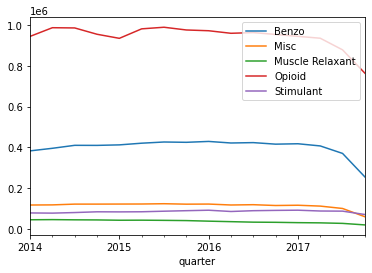

In [16]:
df_counts.columns = [x[1] for x in df_counts.columns]
df_counts.plot()

In [18]:
df_counts

,Benzo,Misc,Muscle Relaxant,Opioid,Stimulant
quarter,,,,,
2014Q1,382776,116952,44542,944841,78086
2014Q2,395445,117596,45266,987419,77120
2014Q3,410005,121356,44277,986277,79992
2014Q4,409708,121383,43721,955239,83647
2015Q1,412202,121660,42233,935275,83224
2015Q2,420470,121908,42507,981840,83820
2015Q3,426306,123327,41657,989706,86585
2015Q4,424796,121129,40526,976304,89118
2016Q1,429133,121591,37707,972564,91398


In [17]:
df_counts.to_json('quarters.json', orient='columns', indent=2)